## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().values.any()

False

In [4]:
(X.dtypes == 'object').values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

Пропущенных значений нет, категориальных признаков тоже.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [7]:
normalizer = StandardScaler()
normalizer.fit(X_train)
X_train = pd.DataFrame(normalizer.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(normalizer.transform(X_test), columns = X_test.columns)

In [8]:
n_list = [1, 3, 5, 10, 15, 25]
results = []
clf_list = []

for n in n_list:
    
    clf = KNeighborsClassifier(n_neighbors=n, p=2)
    clf.fit(X_train[['alcohol', 'magnesium']].values, y_train)
    clf_list.append(clf)
    
    learn_data_predicted = clf.predict(X_train[['alcohol', 'magnesium']])
    train = np.mean(learn_data_predicted==y_train)
    
    test_data_predicted = clf.predict(X_test[['alcohol', 'magnesium']])
    test = np.mean(test_data_predicted==y_test)
    results.append([n, train, test])

res_df = pd.DataFrame(results, columns=['NN', 'Train', 'Test'])
pd.options.display.float_format = "{:,.2f}".format
print(res_df.set_index('NN'))

    Train  Test
NN             
1    1.00  0.61
3    0.83  0.56
5    0.81  0.59
10   0.79  0.59
15   0.74  0.54
25   0.76  0.52


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [9]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [10]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

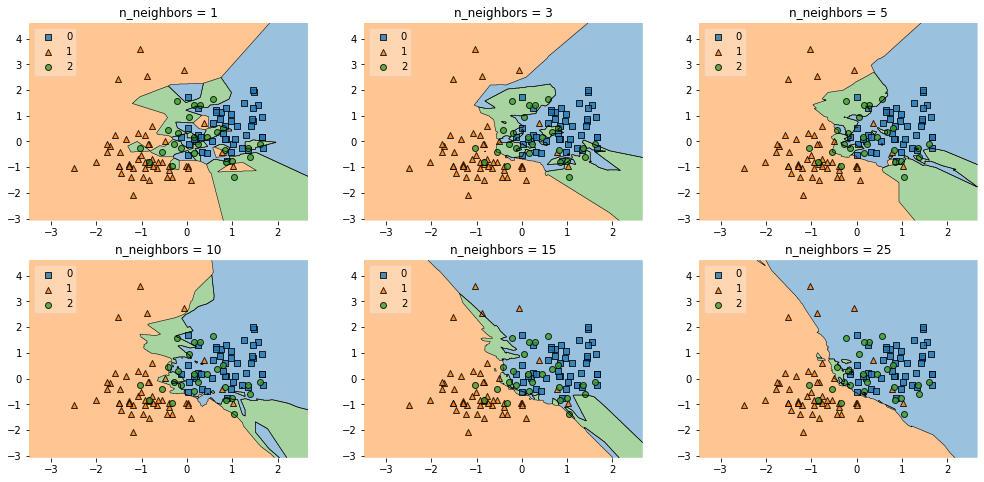

In [12]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(17,8))

labels = [f'n_neighbors = {n}' for n in n_list]

for clf, lab, grd in zip(clf_list,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train[['alcohol', 'magnesium']].values, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

<AxesSubplot:xlabel='NN', ylabel='Accuracy'>

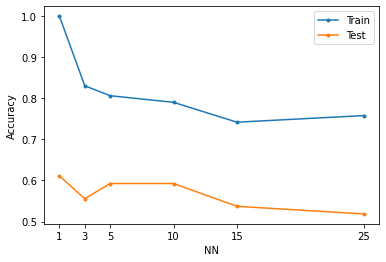

In [11]:
res_df.plot(x='NN', y=['Train', 'Test'], kind='line', style='.-', xticks=res_df['NN'], ylabel='Accuracy')

Если смотреть по значениям accuracy, для обучения классификатора оптимально использовать k=5, так как такое число соседей дает наилучшую долю верных ответов на тестовой выборке и почти самую лучшую на тренировочной. В то же время, даже несмотря на наиболее прилично выглядящий зеленый класс, решающая поверхность выглядит довольно рвано, поэтому этот вариант мне не очень нравится. Наиболее гладкое разделение прослеживается при k=25 и более похоже, что выполняется гипотеза компактности, но зеленый класс почти изчез, что не может быть хорошо, поэтому данное число соседей нравится мне еще меньше, чем пять.

In [14]:
# Напишите потом, пожалуйста, с объяснением, какое здесь на самом деле оптимальное число соседей. Мой тг @nt_lia

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

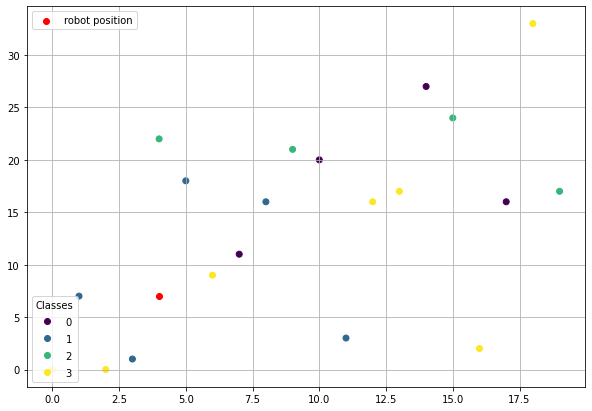

In [15]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [16]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, p=2).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        curr_position = self.trajectory[-1]
        n, p = 1, 0.8
        res = np.random.binomial(n, p)
        
        if res == 1:
            nearest_class = self.knn.predict(curr_position.reshape(1, -1))

            direction = self.mapping[nearest_class[0]]
            self.trajectory.append(np.add(curr_position, direction))
            
        else:
            to_right = np.asarray([1, 0])
            self.trajectory.append(np.add(curr_position, to_right))
    
    
    

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [17]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.asarray(robot.trajectory)
    
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    
    
    _ = plt.legend()
    _ = plt.grid()

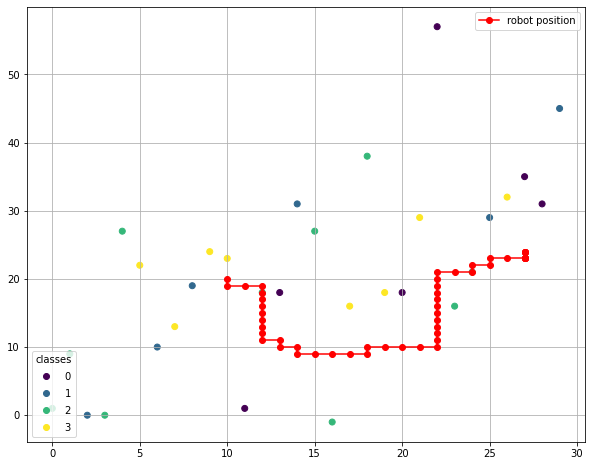

In [18]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

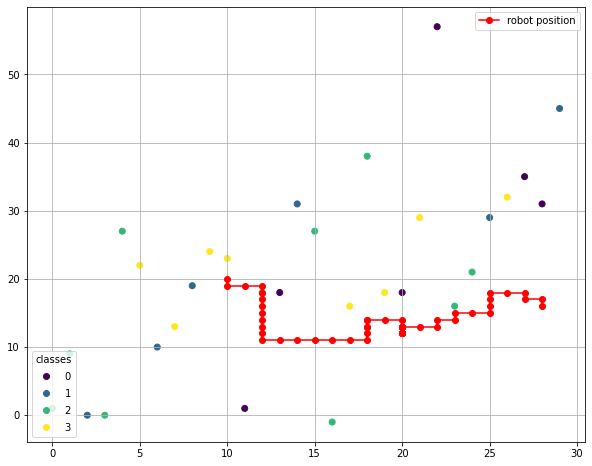

In [19]:
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

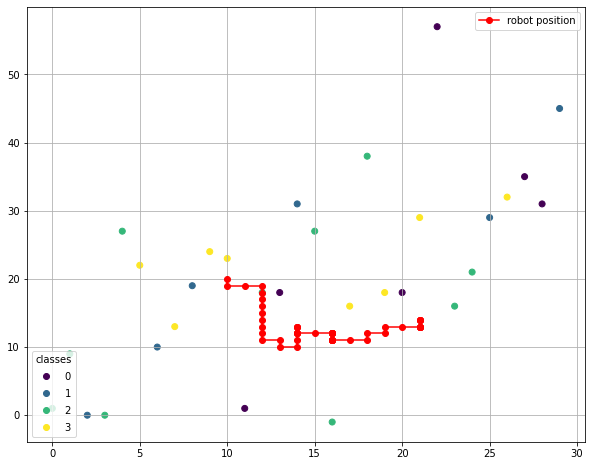

In [20]:
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

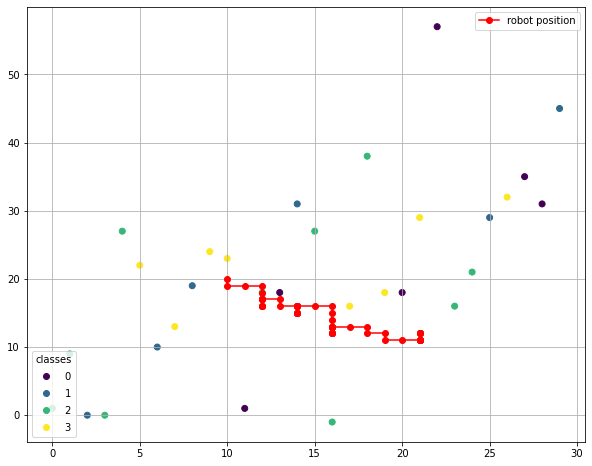

In [21]:
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)

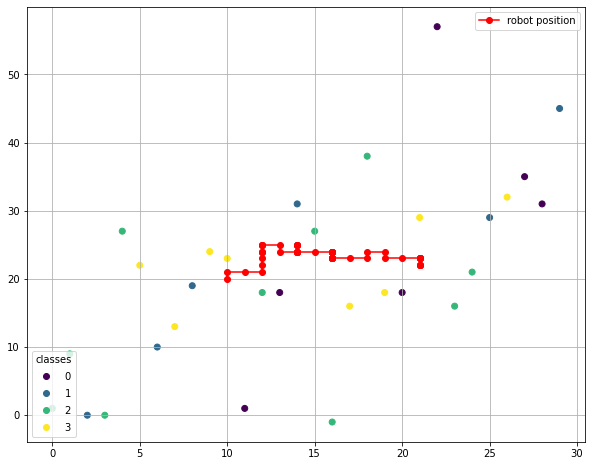

In [22]:
conduct_experiment(x, mean = 3, std = 10, k = 25, n_movements = 50)

Заметим, что чем большее число соседей в нашем эксперименте мы берем, тем короче (если смотреть по оси икс) получается путь робота - он чаще сдвигается вверх или вниз, а не вправо или влево, что говорит о том, что доля предсказаний классов 2 и 3 увеличивается с увеличением числа соседей. Вероятно, это связано с заданным случайным расположением меток (метки класса 1 - движение влево - и класса 0 - движение вправо - расположены дальше друг от друга, чем метки классов 2 и 3, что напрямую влияет на предсказание при увеличении k), и в случае, если классы назначаются меткам не случайно, а осмысленно, данная тенденция может не наблюдаться.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [23]:
data = pd.read_csv('/Users/ndosina/Documents/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [24]:
data.isnull().values.any()

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [25]:
data.drop(columns='Unnamed: 0', inplace=True)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [26]:
import seaborn as sns

<AxesSubplot:>

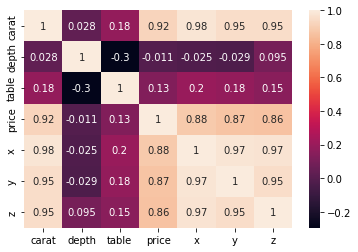

In [27]:
numeric_data = data._get_numeric_data()
sns.heatmap(numeric_data.corr(), annot = True)

In [28]:
numeric_data.corr()

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,0.95,0.09,0.15,0.86,0.97,0.95,1.00


Из вещественных признаков с целевой переменной больше всего коррелируют carat - вес бриллианта, а также x, y, и z - длина, ширина и глубина в мм, так как соответствующие коэффициенты корреляции по модулю близки к единице.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [29]:
categorical = data.select_dtypes('object').columns

In [30]:
data = pd.get_dummies(data, prefix=categorical, columns=categorical, drop_first=True)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [31]:
X = data.loc[:, data.columns != 'price']
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)



**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
lr = LinearRegression().fit(X_train,y_train)

lr_train_mse = mean_squared_error(y_train, lr.predict(X_train))
lr_test_mse = mean_squared_error(y_test, lr.predict(X_test))
print (f"Train: {lr_train_mse}")
print (f"Test: {lr_test_mse}")

prediction = lr.predict(X_test)
mean_squared_error(y_test, prediction)

Train: 1276429.67763654
Test: 1277672.6000845414


1277672.6000845414

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [35]:
# идея отсюда
# https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

pd.DataFrame(lr.coef_, 
             X_train.columns, 
             columns=['coef'])\
            .sort_index(axis=1)

,coef
carat,"5,336.02"
depth,-88.64
table,-54.70
x,"-1,091.57"
y,2.36
z,-52.42
cut_Good,177.08
cut_Ideal,427.26
cut_Premium,344.39
cut_Very Good,313.38


Наибольшие по модулю оценки коэффициентов наблюдаются у следующих признаков: carat, cut (cut quality of the diamond), color, clarity (how obvious inclusions are within the diamond).

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [58]:
lasso = Lasso(10.0).fit(X_train,y_train)
ridge = Ridge(10.0).fit(X_train,y_train)

In [59]:
d = d = {'lr': lr.coef_, 'lasso': lasso.coef_, 'ridge': ridge.coef_}
pd.DataFrame(d, X_train.columns)

,lr,lasso,ridge
carat,"5,336.02","4,851.69","5,297.84"
depth,-88.64,-93.74,-85.45
table,-54.70,-64.99,-54.89
x,"-1,091.57",-643.28,"-1,040.42"
y,2.36,-0.00,1.71
z,-52.42,-58.43,-66.80
cut_Good,177.08,54.28,177.71
cut_Ideal,427.26,226.98,428.58
cut_Premium,344.39,161.55,345.43
cut_Very Good,313.38,147.32,314.87


Веса уменьшились не очень значительно и при L1-регуляризации, и при L2-регуляризации. Это свидетельствует о том, что проблема мультиколлинеарности, о которой свидетельствовали большие по модулю веса при линейно-зависимых признаках, проявлялась в изначальной регрессии не слишком сильно.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [41]:
alphas = [0.1, 1, 10, 100, 200]
lasso_list = []
ridge_list = []

for alpha in alphas:
    lasso = Lasso(alpha).fit(X_train,y_train)
    ridge = Ridge(alpha).fit(X_train,y_train)
    lasso_list.append(np.linalg.norm(lasso.coef_))
    ridge_list.append(np.linalg.norm(ridge.coef_))

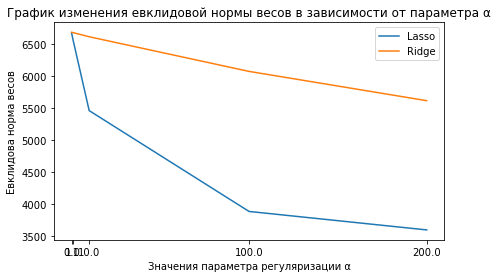

In [42]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.plot(alphas, lasso_list, label = "Lasso")
plt.plot(alphas, ridge_list, label = "Ridge")
plt.xlabel('Значения параметра регуляризации α')
plt.ylabel('Евклидова норма весов')
plt.title('График изменения евклидовой нормы весов в зависимости от параметра α')
ax.set_xticks(alphas)
plt.legend()
plt.show()

Lasso-регрессия, которой на графике соответствует голубая линия, уменьшает веса значительно сильнее. Для отбора признаков ее используют, потому что она зануляет веса у некоторых признаков (что означает, что остаются наиболее значимые признаки, а именно признаки, у которых достаточно большой вес), и поэтому их можно удалить из обучающей выборки.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [43]:
from sklearn.linear_model import LassoCV

In [44]:
reg = LassoCV(cv=5, random_state=0, alphas=alphas).fit(X, y)

In [69]:
quality = pd.DataFrame({'𝛼': reg.alphas_, 'MSE mean': reg.mse_path_.mean(axis=0)}).sort_values(by=['MSE mean'])
quality.style.hide_index()

𝛼,MSE mean
1.000000,630755.036862
0.100000,1041039.030069
100.000000,1917290.094338
200.000000,2037408.825826
10.000000,13886181.369698



Наибольшее качество дает 𝛼 = 1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [46]:
one_lasso = Lasso(1.0).fit(X_train,y_train)
pd.DataFrame(one_lasso.coef_, 
             X_train.columns, 
             columns=['coef'])

,coef
carat,"5,289.14"
depth,-89.83
table,-55.73
x,"-1,050.99"
y,-0.00
z,-48.27
cut_Good,164.93
cut_Ideal,407.43
cut_Premium,326.28
cut_Very Good,296.93


Наиболее информативными оказались такие признаки, как carat (carat weight of the diamond), x (length mm) и clarity (how obvious inclusions are within the diamond), а наименее информативными - y (width mm), z (depth mm), а также depth (the height of a diamond divided by its average girdle diameter) и width (the width of the diamond's table).

Это вполне объяснимо, так как чем больше в бриллианте карат (то есть чем он тяжелее и больше) и чем он чище (чем  менее выражены включения и поверхностные пятна), тем он дороже, так как камни маленького размера и с отметинами встречаются в природе гораздо чаще. На фоне этих характеристик ширина и глубина бриллианта, например, не так важны, так как эти показатели по-отдельности не могут точно охарактеризовать ценность камня.  

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [47]:
one_lasso_test_mse = mean_squared_error(y_test, one_lasso.predict(X_test))
print(f'MSE difference between lr and lasso = {one_lasso_test_mse - lr_test_mse}')

MSE difference between lr and lasso = 798.3115018175449


Для предсказаний лучше использовать Lasso-регрессию, а не обычную линейную регрессию, так как среднеквадратичная ошибка на ней меньше (в моем случае ~ на 798). Данная разница в результатах может объясняться тем, что модель без регуляризации, в которой у признаков были бОльшие веса, сильнее подогналась под обучающую выборку и на тесте показала менее хороший результат, чем модель с регуляризацией, в которой не только присутствовали штрафы, но и были отобраны признаки.